In [15]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv(r'D:\ds_ridwan\mainan-modular\data\train.csv')
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [6]:
df.drop(columns=['id'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
df.nunique()

Name                                     422
Gender                                     2
Age                                       43
City                                      98
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     331
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [13]:
# check for missing values
misval = df.isnull().sum() / len(df)*100
for i in misval.index:
    if misval[i] > 0:
        print(f"{i} : {misval[i]:.3f}% missing values")

Profession : 26.034% missing values
Academic Pressure : 80.173% missing values
Work Pressure : 19.842% missing values
CGPA : 80.172% missing values
Study Satisfaction : 80.173% missing values
Job Satisfaction : 19.837% missing values
Dietary Habits : 0.003% missing values
Degree : 0.001% missing values
Financial Stress : 0.003% missing values


In [16]:
print(df.sample(8))

          Name  Gender   Age       City Working Professional or Student  \
93065     Shiv    Male  53.0   Vadodara            Working Professional   
7195      Jiya  Female  28.0      Thane                         Student   
49562   Sanket    Male  38.0      Delhi            Working Professional   
58009    Ivaan    Male  36.0     Rajkot            Working Professional   
112685   Gagan    Male  46.0     Meerut            Working Professional   
51834     Amit    Male  24.0  Hyderabad                         Student   
55542    Rishi    Male  31.0   Ludhiana            Working Professional   
48380   Kartik    Male  23.0     Mumbai                         Student   

              Profession  Academic Pressure  Work Pressure  CGPA  \
93065            Teacher                NaN            3.0   NaN   
7195                 NaN                1.0            NaN  9.88   
49562   Customer Support                NaN            4.0   NaN   
58009     UX/UI Designer                NaN         

In [17]:
# seperate into numerical and categorical columns
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [18]:
num_cols

['Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression']

In [19]:
cat_cols

['Name',
 'Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

## Mini EDA

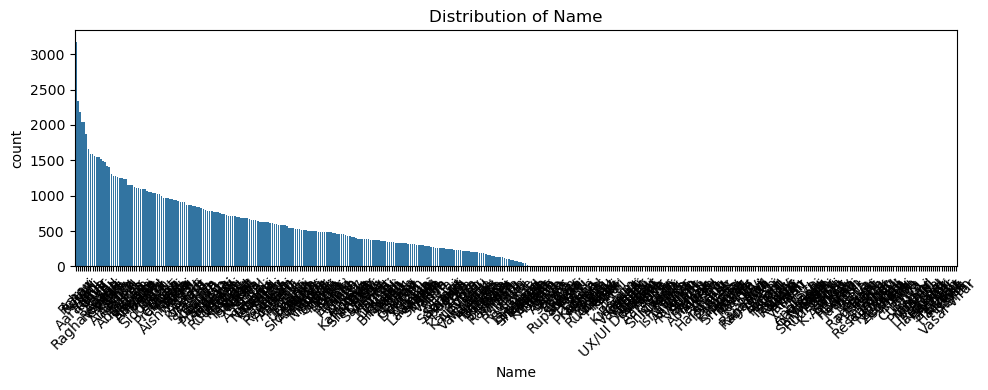

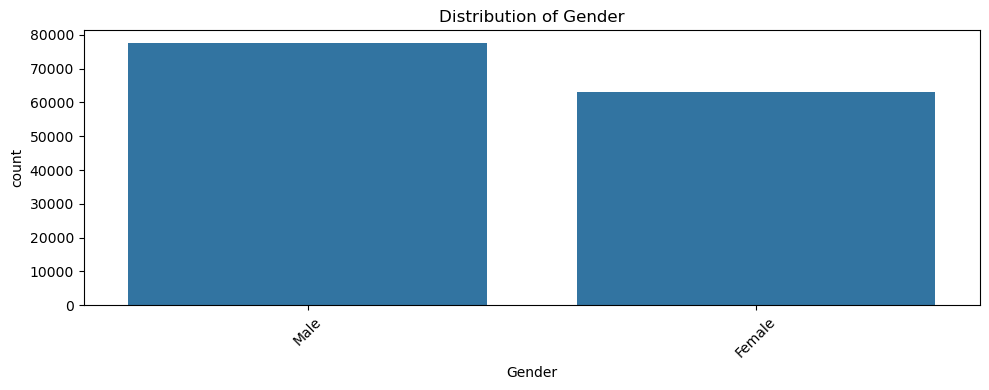

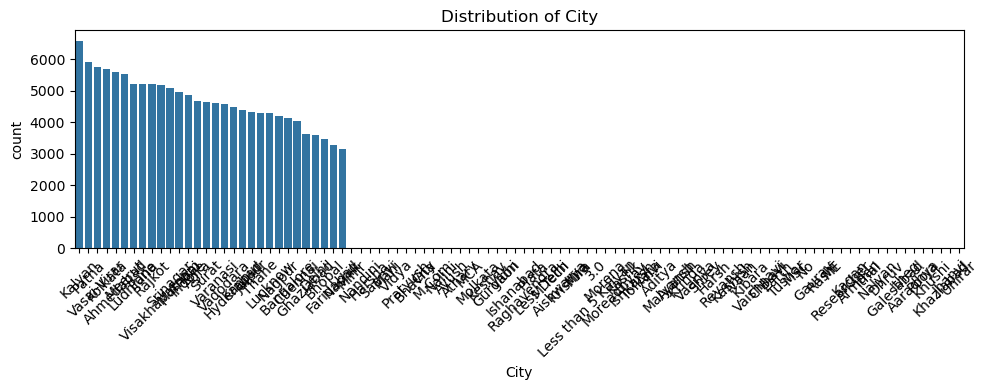

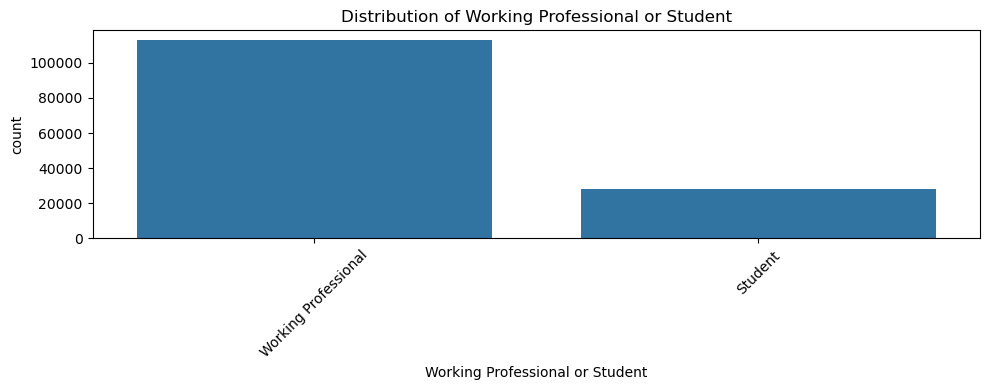

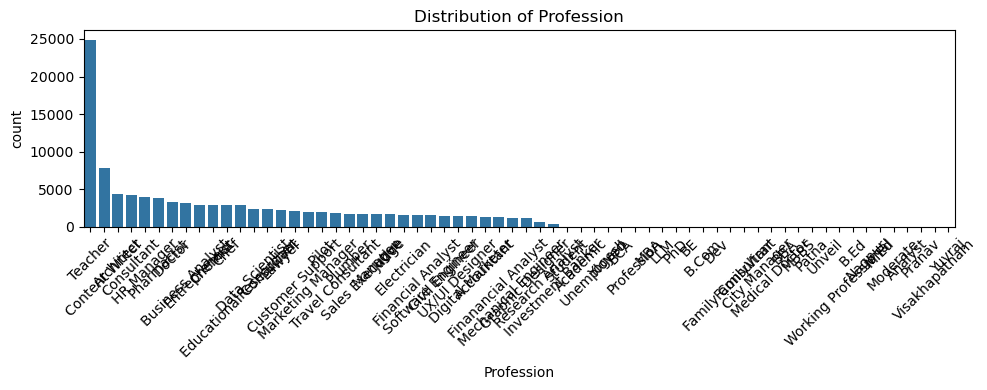

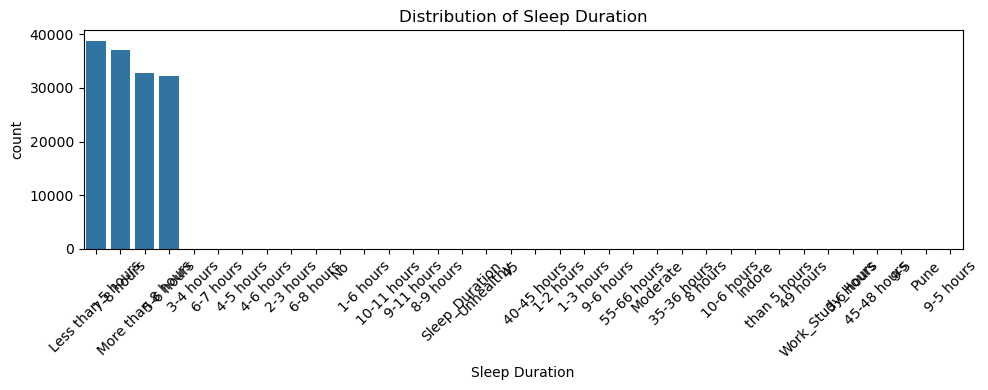

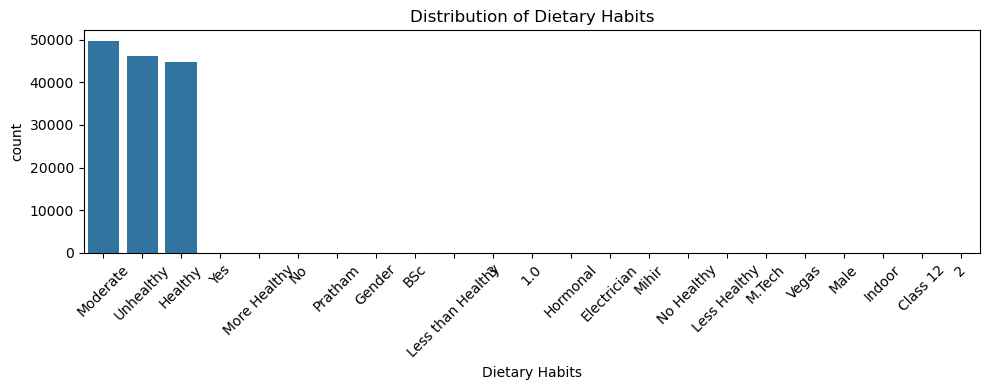

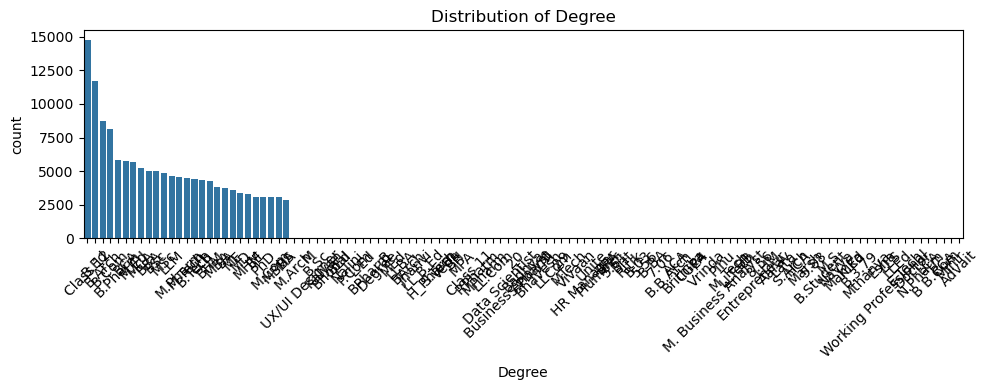

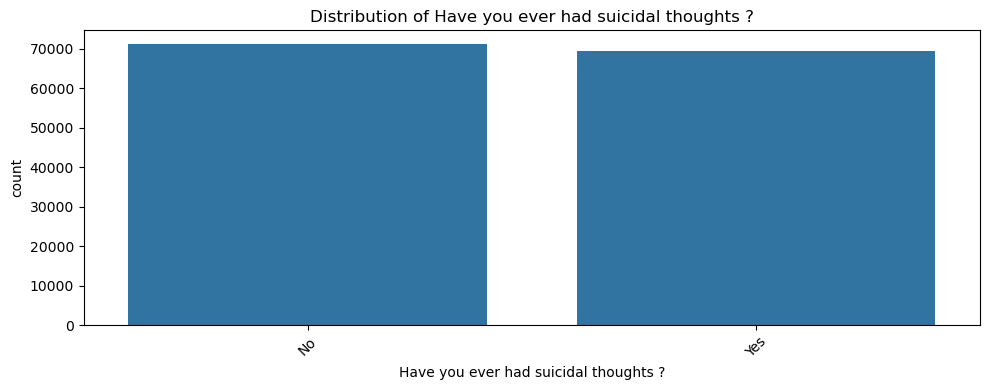

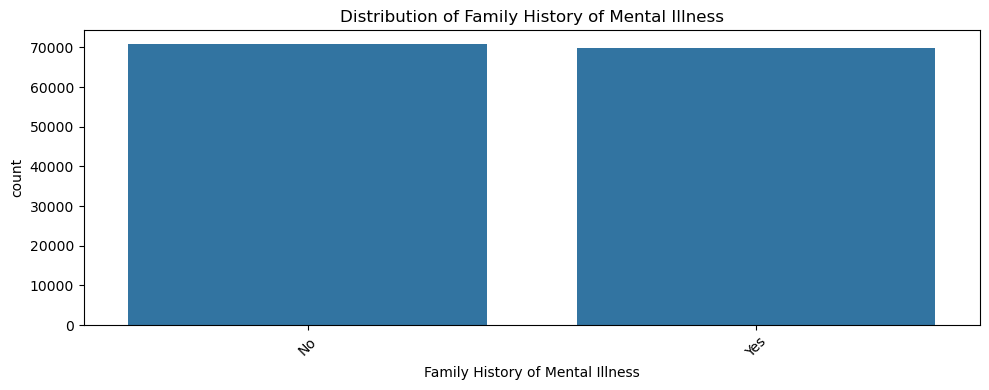

In [21]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()

In [24]:
print(df.nunique())

Name                                     422
Gender                                     2
Age                                       43
City                                      98
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     331
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['City', 'count'] but received: index
 To use the index, pass it in directly as `df.index`.